<a href="https://colab.research.google.com/github/akkiyolo/pytorch/blob/main/pytorch002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
x=torch.tensor(3.0,requires_grad=True)

In [3]:
y=x**2

In [4]:
x

tensor(3., requires_grad=True)

In [5]:
y # what pytorch basically does is create a computation graph and stores in kind of memory that which function was used to create this

tensor(9., grad_fn=<PowBackward0>)

In [6]:
y.backward()

In [7]:
x.grad

tensor(6.)

In [8]:
x=torch.tensor(3.0,requires_grad=True)


In [9]:
y=x**2

In [10]:
z=torch.sin(y)

In [11]:
x

tensor(3., requires_grad=True)

In [12]:
y

tensor(9., grad_fn=<PowBackward0>)

In [13]:
z

tensor(0.4121, grad_fn=<SinBackward0>)

In [14]:
z.backward()

In [15]:
x.grad

tensor(-5.4668)

y.grad is an intermediate node and it cannot be computed 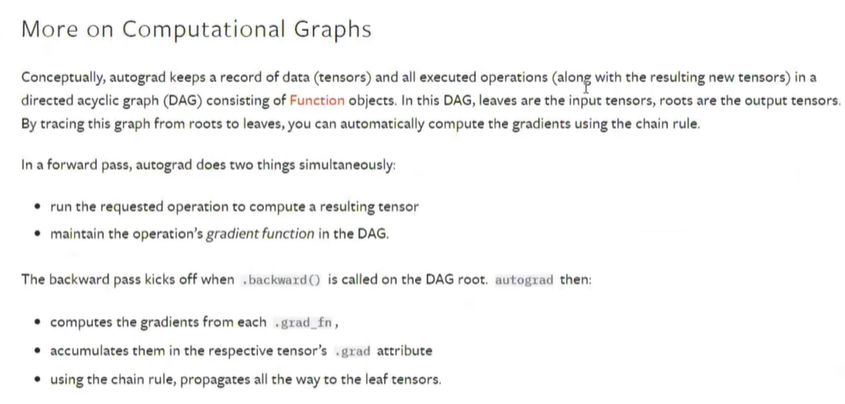

In [16]:
y.grad

/tmp/ipython-input-486760323.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


In [17]:
import torch

# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

In [18]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
    epsilon = 1e-8  # To prevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [19]:
# Forward pass
z = w * x + b  # Weighted sum (linear part)
y_pred = torch.sigmoid(z)  # Predicted probability

# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)

In [21]:
loss

tensor(6.7012)

In [22]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [23]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218
